In [1]:
from sklearn.datasets import fetch_openml

In [5]:
import pandas as pd
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784',as_frame = False)

In [42]:
# print(mnist.DESCR)

In [46]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X,y = mnist.data, mnist.target # this is hand written data and the digit

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [18]:
X.shape

(70000, 784)

In [20]:
y.shape


(70000,)

In [24]:
import matplotlib.pyplot as plt

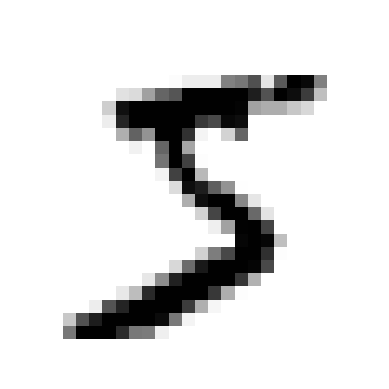

In [34]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap= "binary")
    plt.axis("off")

some_digit = X[0] # this will give the data of first image 
plot_digit(some_digit)
plt.show()

In [36]:
y[0] # this represent the digit at x[0]

'5'

In [38]:
X_train , X_test , y_train , y_test = X[:60000], X[60000:],y[:60000],y[60000:]

In [50]:
y_train_5 = (y_train == '5') # True for all 5s , False for all other digits
y_test_5 = (y_test == '5')

In [54]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [56]:
sgd_clf.predict([some_digit])

array([ True])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv =3,scoring = "accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [62]:
# confusion Matrices

In [64]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv =3)


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [74]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [76]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [78]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)


0.7325171197343847

In [80]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [82]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)

In [84]:
y_some_digit_pred

array([ True])

In [87]:
threshold = 3000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [89]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3,method = "decision_function")

In [91]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds =  precision_recall_curve(y_train_5,y_scores)

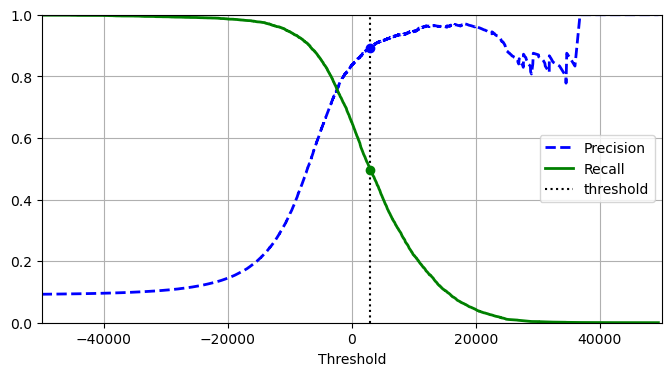

In [103]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

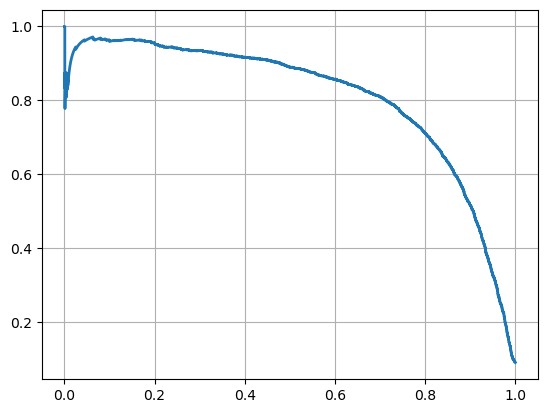

In [109]:
plt.plot(recalls,precisions,linewidth = 2, label = "Precision/Recall curve")
plt.grid()

In [111]:
# finding the index for 90 percent precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [113]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [115]:
precision_score(y_train_5,y_train_pred_90)


0.9000345901072293

In [121]:
recall_90_precission  =  recall_score(y_train_5,y_train_pred_90)
recall_90_precission

0.4799852425751706

In [123]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

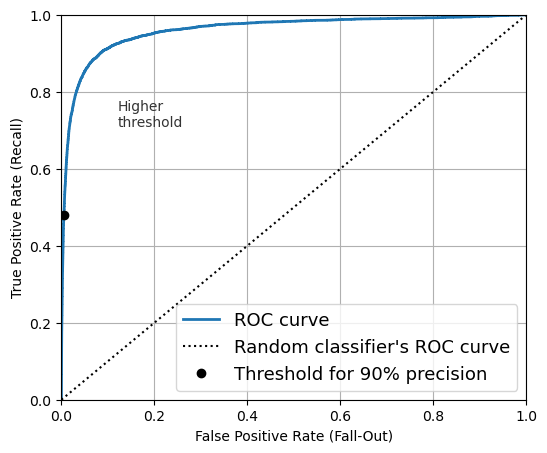

In [127]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
# plt.gca().add_patch(patches.FancyArrowPatch(
#     (0.20, 0.89), (0.07, 0.70),
#     connectionstyle="arc3,rad=.4",
#     arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#     color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


In [129]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [131]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)


In [133]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv =3,method = "predict_proba")

In [143]:
y_probas_forest[:,0]

array([0.11, 0.99, 0.96, ..., 0.02, 0.92, 0.94])

In [145]:
y_scores_forest =  y_probas_forest[:,1]
precisions_forest,recall_forests,thresholds_forests = precision_recall_curve(y_train_5,y_scores_forest)

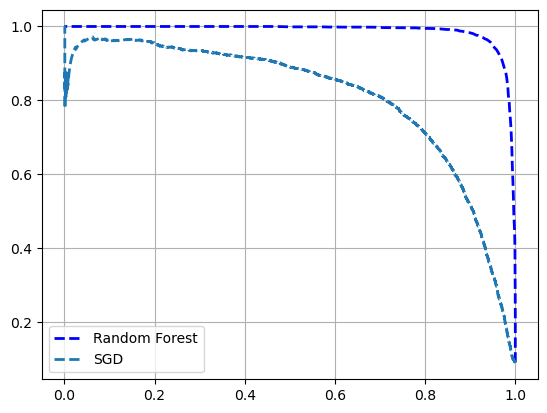

In [155]:
plt.plot(recall_forests,precisions_forest,"b--",linewidth = 2,label = "Random Forest")
plt.plot(recalls,precisions,"--",linewidth = 2,label = "SGD")
plt.grid()
plt.legend(loc = "lower left")